###  Python Basics Tutorial

####  Regression Machine Learning Case Study

####  Machine Learning Mastery with Python
####  Jason Brownlee

## Prepare Problem

In [22]:
## Load Libraries

import numpy
from numpy import arange

from pandas import read_csv
from pandas import set_option

# load plotting tools
from matplotlib import pyplot
from matplotlib import figure
from pandas.plotting import scatter_matrix

## load data scaling module
from sklearn.preprocessing import StandardScaler

## Load model selection modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## load algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

## load ensemble method modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

In [11]:
## load data
path = 'D:\OneDrive - QJA\My Files\DataScience\DataSets'
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
         'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = read_csv(path + '\\' + filename, 
              delim_whitespace = True,
              names = names)

## 2. Summarize Data 

In [12]:
print(df.shape)
print(df.dtypes)

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [14]:
print(df.head(10)); print('---'); print(df.tail(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396

## 2a: Descriptive Statistics

In [15]:
# Basic stats for central tendency and variance
set_option('precision', 1)
print(df.describe().T)

         count     mean    std      min      25%    50%    75%    max
CRIM     506.0  3.6e+00    8.6  6.3e-03  8.2e-02    0.3    3.7   89.0
ZN       506.0  1.1e+01   23.3  0.0e+00  0.0e+00    0.0   12.5  100.0
INDUS    506.0  1.1e+01    6.9  4.6e-01  5.2e+00    9.7   18.1   27.7
CHAS     506.0  6.9e-02    0.3  0.0e+00  0.0e+00    0.0    0.0    1.0
NOX      506.0  5.5e-01    0.1  3.9e-01  4.5e-01    0.5    0.6    0.9
RM       506.0  6.3e+00    0.7  3.6e+00  5.9e+00    6.2    6.6    8.8
AGE      506.0  6.9e+01   28.1  2.9e+00  4.5e+01   77.5   94.1  100.0
DIS      506.0  3.8e+00    2.1  1.1e+00  2.1e+00    3.2    5.2   12.1
RAD      506.0  9.5e+00    8.7  1.0e+00  4.0e+00    5.0   24.0   24.0
TAX      506.0  4.1e+02  168.5  1.9e+02  2.8e+02  330.0  666.0  711.0
PTRATIO  506.0  1.8e+01    2.2  1.3e+01  1.7e+01   19.1   20.2   22.0
B        506.0  3.6e+02   91.3  3.2e-01  3.8e+02  391.4  396.2  396.9
LSTAT    506.0  1.3e+01    7.1  1.7e+00  6.9e+00   11.4   17.0   38.0
MEDV     506.0  2.3e

In [16]:
## correlation

set_option('precision', 2)
print(df.corr(method = 'pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

### 2b: Data Visualizations

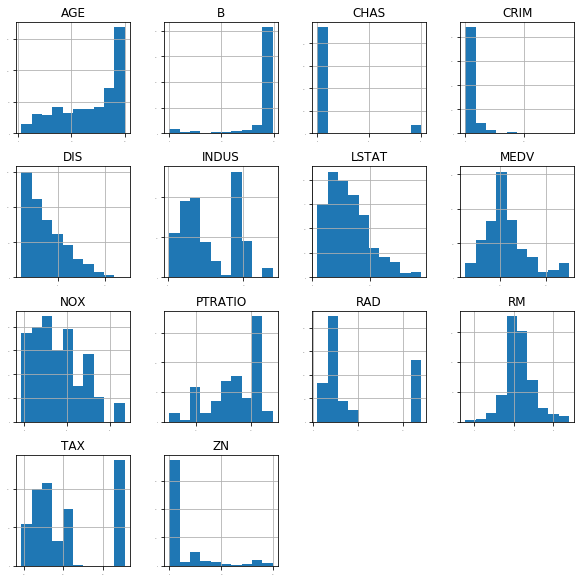

In [36]:
## unimodal data visualization

## histogram

#pyplot.figure(figsize=(1, 1))
              
df.hist(sharex = False, sharey = False,
        xlabelsize = 0.1, 
        ylabelsize = 0.1)
pyplot.gcf().set_size_inches(10, 10)
pyplot.show()

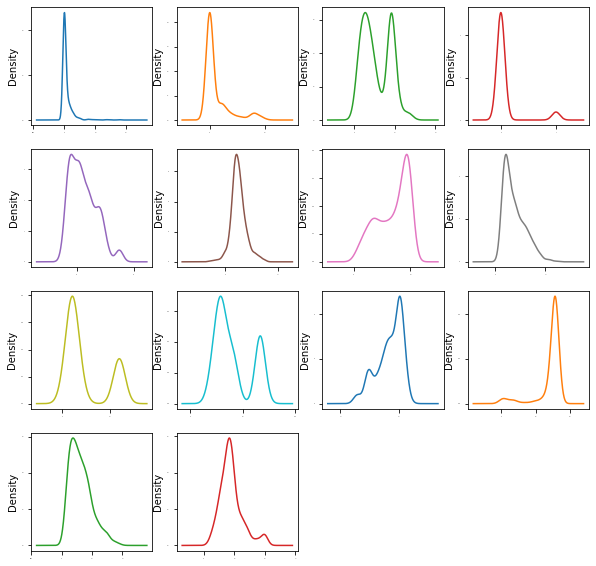

In [42]:
## density plot

df.plot(kind = 'density',
        subplots = True, 
        layout = (4, 4),
        sharex = False, sharey = False,
        legend = False,
        fontsize = 1)
pyplot.gcf().set_size_inches(10, 10)
pyplot.show()

<function matplotlib.pyplot.show(*args, **kw)>

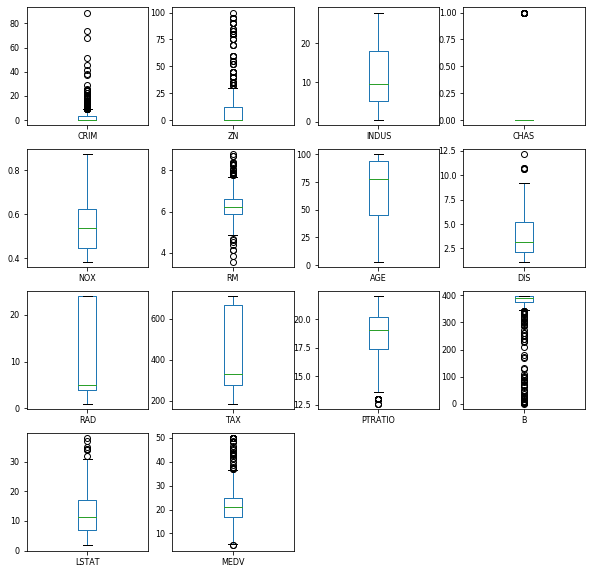

In [47]:
# box plots

df.plot(kind = 'box',
        subplots = True, layout = (4, 4),
        sharex = False, sharey = False,
        fontsize = 8)

pyplot.gcf().set_size_inches(10, 10)
pyplot.show

## 2c: Multi-modal data vis

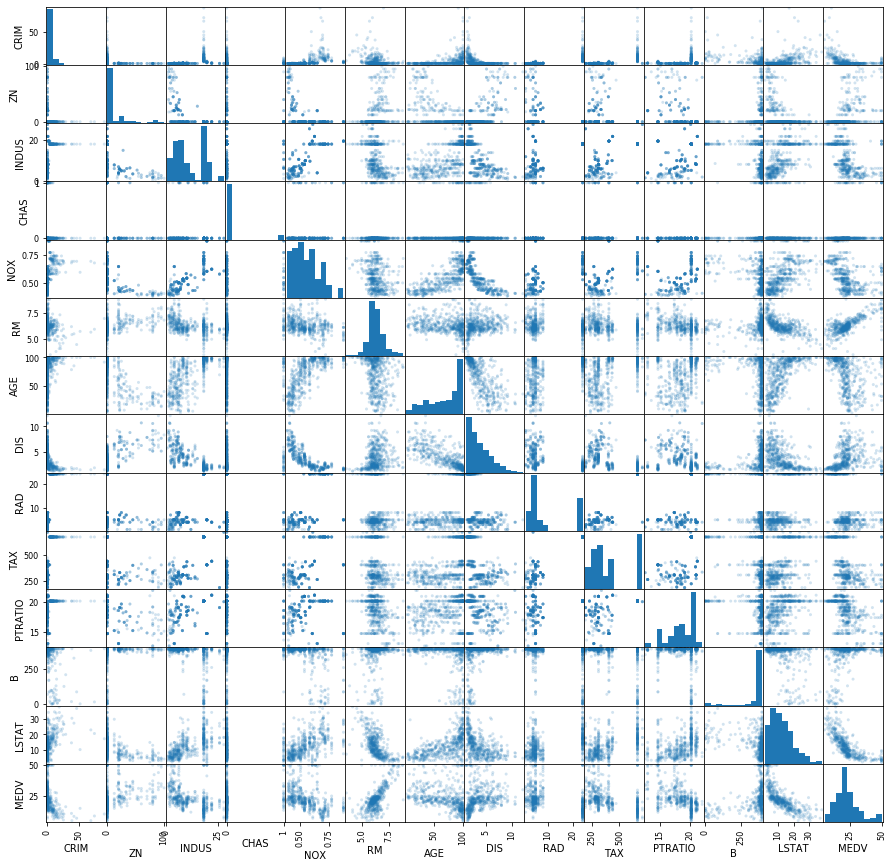

In [52]:
## scatter plot matrix

scatter_matrix(df,
              figsize = (15, 15),
              alpha = 0.2,
              grid = True)
pyplot.show()

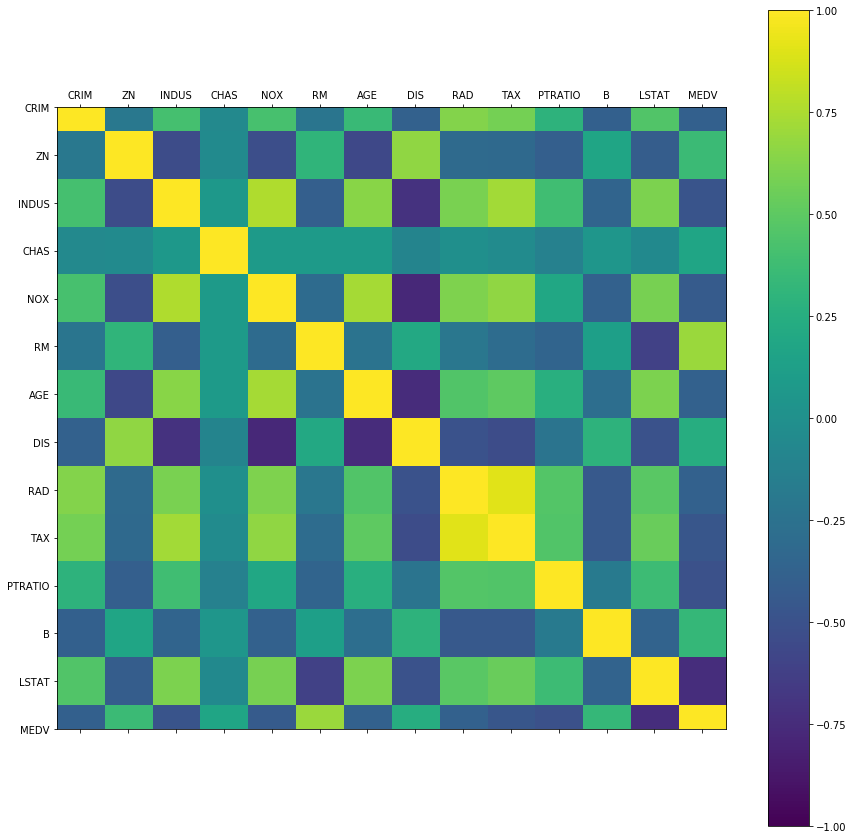

In [61]:
## correlation matrix

fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1)

cax = ax.matshow(df.corr(),
                 vmin = -1, vmax = 1,
                 interpolation = 'none')

fig.colorbar(cax)
ticks = numpy.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

pyplot.gcf().set_size_inches(15, 15)

pyplot.show()

## 3: Prepare Data
### 3a: Data Cleaning
### 3b: Feature Selection
### 3c: Data Transformation

## 4: Evaluate Algorithms

### 4a: Split Train Test

In [62]:
array = df.values
X = array[:, 0:13]
Y = array[:, 13]

val_size = 0.20
seed = 7

X_tr, X_va, Y_tr, Y_va = train_test_split(X, Y,
                                          test_size = val_size, 
                                          random_state = seed)

### 4b: Test option and evaluation metric

In [63]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

### 4c: Spot-check Algorithms

In [87]:
## create list with models to be used
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma = 'auto')))

In [90]:
## evaluate the models and create list with results for comparison

results = []  # empty list to store results
names = []  # empty list to store algo name

for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model,
                                 X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: MSE(%.3f), Stnd Dev(%.3f)' % (name,
                                             cv_results.mean(),
                                             cv_results.std()
                                            )
    print(msg)
    
## remember closest to zero is better

LR: MSE(-21.380), Stnd Dev(9.414)
LASSO: MSE(-26.424), Stnd Dev(11.651)
EN: MSE(-27.502), Stnd Dev(12.305)
KNN: MSE(-41.896), Stnd Dev(13.902)
CART: MSE(-21.793), Stnd Dev(10.863)
SVR: MSE(-85.518), Stnd Dev(31.995)


### 4d: Compare Algorithms

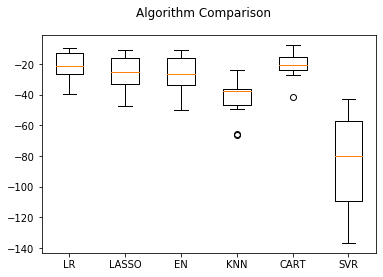

In [78]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(1, 1, 1)
pyplot.boxplot(results)
ax.set_xticklabels(names)

pyplot.show()

# LR has lowest MSE (see above) but boxplot shows
# not really any statistical difference between
# LR, Lasso, EN, CART.  However, LR is typically
# easier to explain to stakeholder so right now,
# LR may be best model


### Evaluate Algorithms: Standardized Data

In [92]:
## standardized the dataset

pipelines = []

pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LR', LinearRegression())])))

pipelines.append(('SclaedLASSO',
                  Pipeline([('Scaler', StandardScaler()),
                            ('LASSO', Lasso())])))

pipelines.append(('ScaledEN',
                  Pipeline([('Scaler', StandardScaler()),
                            ('EN', ElasticNet())])))

pipelines.append(('ScaledKNN',
                  Pipeline([('Scaler', StandardScaler()),
                            ('KNN', KNeighborsRegressor())])))

pipelines.append(('ScaledCART',
                  Pipeline([('Scaler', StandardScaler()),
                            ('CART', DecisionTreeRegressor())])))

pipelines.append(('ScaledSVR',
                  Pipeline([('Scaler', StandardScaler()),
                           ('SVR', SVR())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model,
                                 X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    
    scale_msg = '%s: MSE(%.3f), Stnd Dev(%.3f)' % (name,
                                                   cv_results.mean(), 
                                                   cv_results.std())
    
    print(scale_msg)

ScaledLR: MSE(-21.380), Stnd Dev(9.414)
SclaedLASSO: MSE(-26.607), Stnd Dev(8.979)
ScaledEN: MSE(-27.932), Stnd Dev(10.587)
ScaledKNN: MSE(-20.108), Stnd Dev(12.377)
ScaledCART: MSE(-24.670), Stnd Dev(12.191)
ScaledSVR: MSE(-29.633), Stnd Dev(17.009)


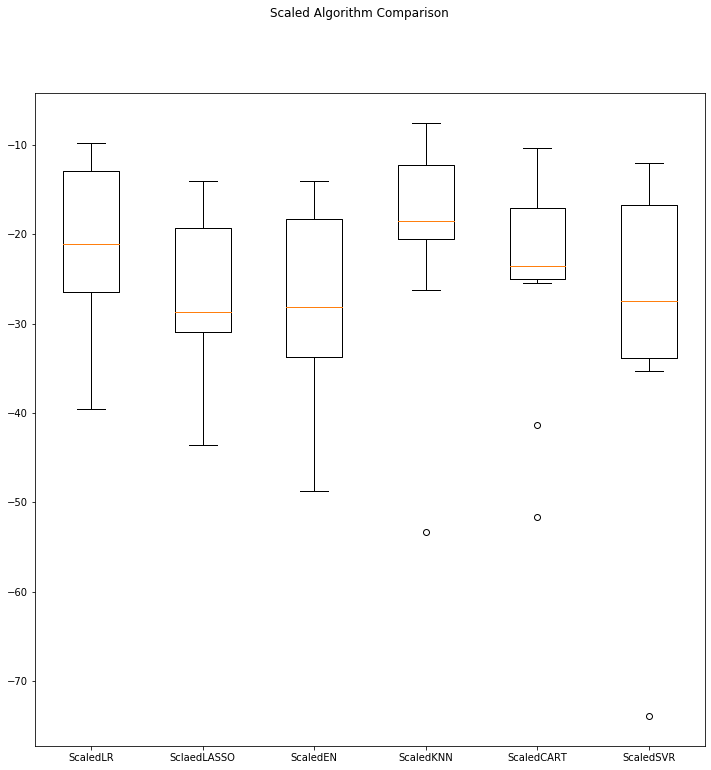

In [94]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')

ax = fig.add_subplot(1, 1, 1)
pyplot.boxplot(results)
ax.set_xticklabels(names)

pyplot.gcf().set_size_inches(12, 12)

pyplot.show()

# plot shows KNN has best MSE (closes to zero) and relatively
# less variance, but based on means and IQR, these models appear
# to be performing relatively similar and there is no signficant
# stand-out

## 5: Improve Accuracy

### 5a: tunning

In [98]:
## in this tutorial, KNN is selected because it has best negMSE
## but it practice, would consider LR since all algo's appear
## to be statistically similar and LR is more explainable

## KNN

## default KNN neighbors used above was 7.  Can use grid search to 
## possibly find better

scaler = StandardScaler().fit(X_tr)
rescaledX = scaler.transform(X_tr)

k_values = numpy.array([1, 3, 5, 7, 8, 11,
                        13, 15, 17, 19, 21])

param_grid = dict(n_neighbors = k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits = num_folds, random_state = seed)

grid = GridSearchCV(estimator = model,
                    param_grid = param_grid,
                    scoring = scoring,
                    cv = kfold)

grid_result = grid.fit(rescaledX, Y_tr)

print('Best: %.3f using %s' % (grid_result.best_score_, 
                               grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%.3f (%.3f) with %r' % (mean, stdev, param))

## best = n-neighbors 3 reduces negMSE from -20 to -18

Best: -18.172 using {'n_neighbors': 3}
-20.209 (15.030) with {'n_neighbors': 1}
-18.172 (12.951) with {'n_neighbors': 3}
-20.131 (12.204) with {'n_neighbors': 5}
-20.576 (12.346) with {'n_neighbors': 7}
-20.245 (12.101) with {'n_neighbors': 8}
-21.009 (11.610) with {'n_neighbors': 11}
-21.152 (11.943) with {'n_neighbors': 13}
-21.557 (11.536) with {'n_neighbors': 15}
-22.790 (11.567) with {'n_neighbors': 17}
-23.872 (11.340) with {'n_neighbors': 19}
-24.361 (11.915) with {'n_neighbors': 21}


C:\Users\delos001\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 5b: Ensemble Methods

In [103]:
## using same test harnass as above (and same accuracy metric) with 
##   adaboost, GBM, RF, ET

ensembles = []
ensembles.append(('ScaledAB',
                  Pipeline([('Scaler', StandardScaler()),
                            ('AB', AdaBoostRegressor())])))

ensembles.append(('ScaledGBM',
                  Pipeline([('Scaler', StandardScaler()),
                            ('GBM', GradientBoostingRegressor())])))

ensembles.append(('ScaledRF',
                  Pipeline([('Scaler', StandardScaler()),
                            ('RF', RandomForestRegressor(n_estimators = 10))])))

ensembles.append(('ScaledET',
                  Pipeline([('Scaler', StandardScaler()),
                            ('ET', ExtraTreesRegressor(n_estimators = 10))])))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(model,
                                 X_tr, Y_tr,
                                 cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    
    ens_msg = '%s: %.3f (%.3f)' % (name, 
                                   cv_results.mean(),
                                   cv_results.std())
    
    print(ens_msg)

ScaledAB: -14.992 (6.585)
ScaledGBM: -10.205 (4.584)
ScaledRF: -12.598 (5.768)
ScaledET: -10.637 (6.060)


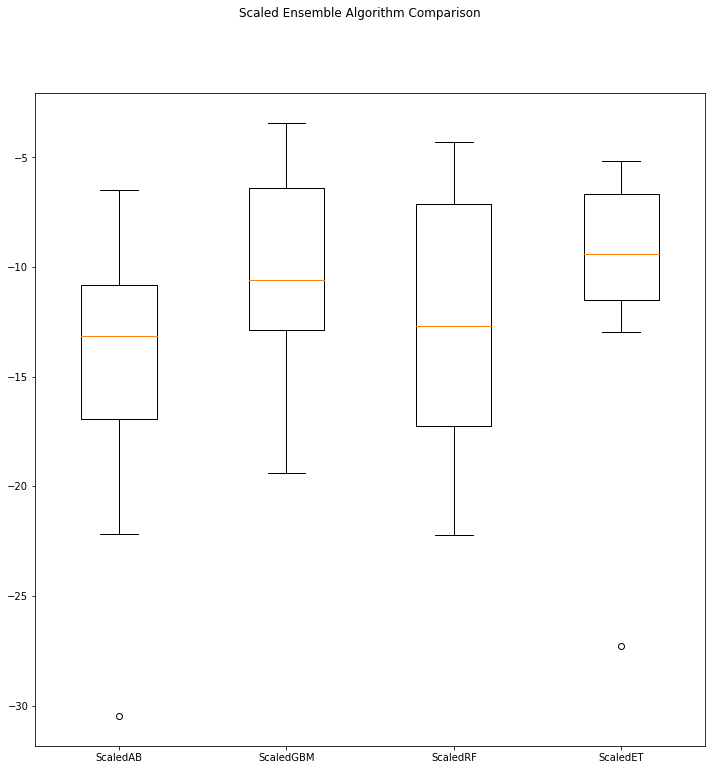

In [106]:
## compare algorithms

fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')

ax = fig.add_subplot(1, 1, 1)

pyplot.boxplot(results)

ax.set_xticklabels(names)

pyplot.gcf().set_size_inches(12, 12)

pyplot.show()

## GBM has better mean score (above) and ET seems to have better
##    median score (boxplot below).  Again, all these models seem
##    to not be statistically different
## All these appear to be better than the linear and non-linear 
##    models from the KNN and standardized pipeline models above

In [108]:
# tune scaled GBM
## default boosting runs is (n_estimators) is 100.
##   can tune run number to attempt to get better results
## Note: will increase run time

scaler = StandardScaler().fit(X_tr)
rescaledX = scaler.transform(X_tr)

param_grid = dict(n_estimators = numpy.array([50, 100, 150, 200,
                                              250, 300, 350, 400]))

model = GradientBoostingRegressor(random_state = seed)
kfold = KFold(n_splits = num_folds, random_state = seed)

grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    scoring = scoring,
                    cv = kfold,
                    iid = True)

grid_result = grid.fit(rescaledX, Y_tr)

print('Best: %.3f using %s' % (grid_result.best_score_,
                               grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']

params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))
    

## n_estimators: 400 results in negMSE -9.35 is slightly better than 
##    un-tuned method

Best: -9.354 using {'n_estimators': 400}
-10.812167 (4.724394) with: {'n_estimators': 50}
-10.040857 (4.441758) with: {'n_estimators': 100}
-9.694045 (4.275653) with: {'n_estimators': 150}
-9.539481 (4.270153) with: {'n_estimators': 200}
-9.449042 (4.261930) with: {'n_estimators': 250}
-9.426909 (4.271399) with: {'n_estimators': 300}
-9.366779 (4.251669) with: {'n_estimators': 350}
-9.353870 (4.265816) with: {'n_estimators': 400}


## 6: Finalize Model

In [112]:
## Using the best model (Gradient boosting iwth n_estimators = 400), 
##   prepare model, train it on entire training set then generate predictions

# prepare model

scaler = StandardScaler().fit(X_tr)
rescaledX = scaler.transform(X_tr)

model = GradientBoostingRegressor(random_state = seed,
                                  n_estimators = 400)
model.fit(rescaledX, Y_tr)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto', random_state=7,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [114]:
## transform the validation data

rescaledValidationX = scaler.transform(X_va)
predictions = model.predict(rescaledValidationX)

print(mean_squared_error(Y_va, predictions))

MSE is 11.88 which is close to our estimate negMSE of -9.35

11.878916447820348
